In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data

In [2]:
train_data = pd.read_csv("train.csv", index_col = 'Id')
test_data = pd.read_csv("test.csv", index_col = "Id")

X_train = train_data.drop(['SalePrice'], axis = 1)
y1 = train_data['SalePrice']

X = pd.concat([X_train, test_data], axis = 0)

In [3]:
y1.isnull().sum()

0

In [4]:
print(X_train.shape)
print(test_data.shape)

(1460, 79)
(1459, 79)


In [5]:
numCols = list(X_train.select_dtypes(exclude='object').columns)
catCols = list(X_train.select_dtypes(include='object').columns)

In [6]:
print(numCols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [7]:
print(catCols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Exploratory Data Analysis

### Target Variable

We want to take a look at the distribution of our target variable.

We find out that it is right-skewed. 

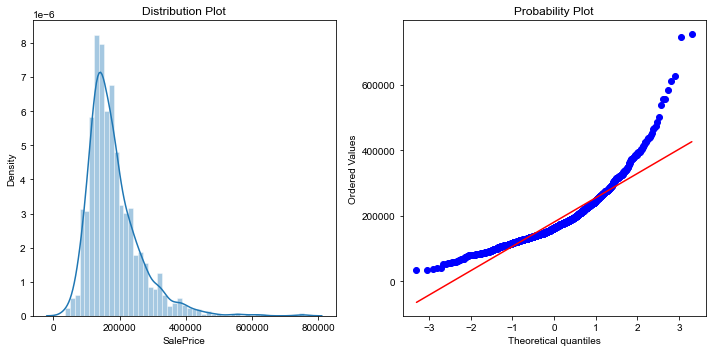

In [8]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.set_style('darkgrid')

sns.distplot(y1, ax=axes[0])
axes[0].set_title('Distribution Plot')

axes[1] = stats.probplot((y1), plot=plt)
plt.tight_layout()

plt.savefig('SalePrice_distribution')

#### Log Transformation

Log transformation shows more normal distribution, so this will be our target variable.

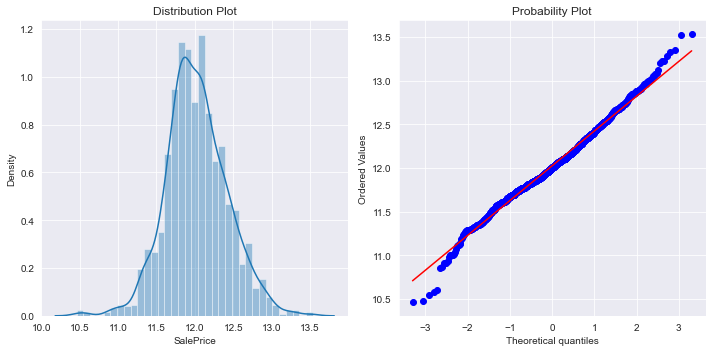

In [9]:
y = np.log(y1)
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.distplot(y, ax=axes[0])
axes[0].set_title('Distribution Plot')

axes[1] = stats.probplot((y), plot=plt)
plt.tight_layout()

plt.savefig('log_SalePrice_distribution')

### Numerical Variables

In [10]:
print(numCols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### Categorical Variables

In [11]:
print(catCols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Ordinal Variables

In [12]:
ordinal_cols = ['LotShape', 'LandSlope', 'ExterQual',
               'ExterCond','BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'HeatingQC','CentralAir', 'KitchenQual',
               'Functional','FireplaceQu', 'GarageFinish', 
               'GarageQual', 'GarageCond', 'PavedDrive', 
               'Fence', 'PoolQC']

#### Nominal Variables

In [13]:
nominal_cols = ['MSSubClass', 'MSZoning', 'LandContour',
                  'LotConfig', 'Neighborhood', 'BldgType',
                  'HouseStyle', 'RoofStyle', 'MasVnrType',
                  'Foundation', 'GarageType', 'SaleType',
                  'SaleCondition', 'Condition1','Exterior1st',
                  'Exterior2nd', 'MiscFeature', 'Alley', 'Utilities', 
                'Electrical',]

# Correlation

We can see that there is multicollinearity in our dataset.

- GarageYrBlt and YearBuilt
- 1stFlrSF and 2ndFlrSF
- TotRmsAbvGrd and GrLivArea
- GarageArea and GarageCars
- GrLivArea and 2ndFlrSF

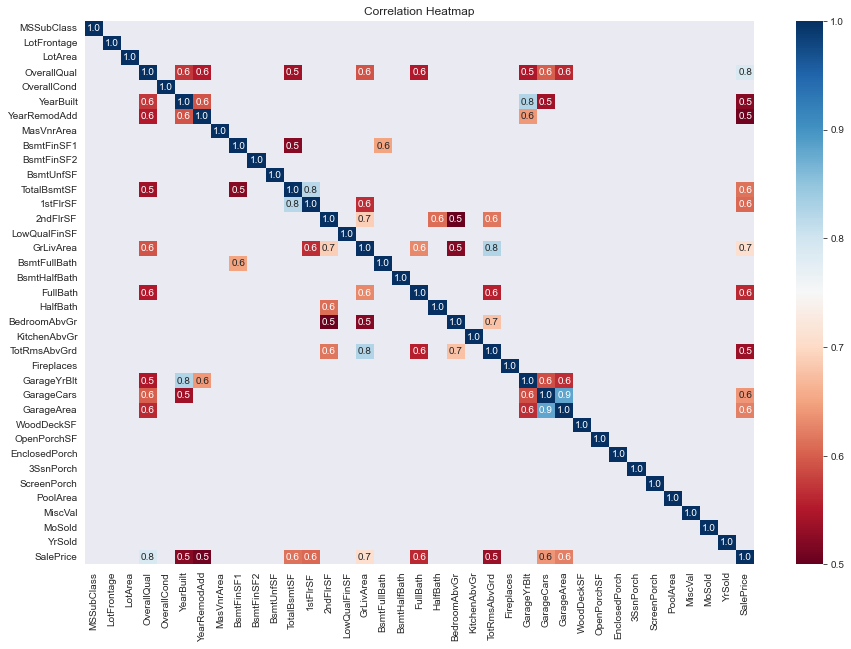

In [14]:
corr_mat = train_data.corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='RdBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

plt.savefig('Correlation Heatmap')

Between each pair, drop the one that is least correlated with our target variable.

In [15]:
X = X.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars'], axis = 1)

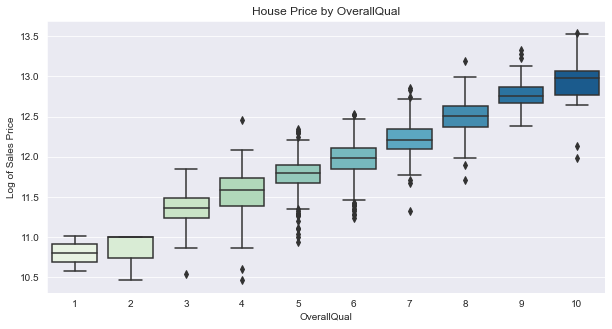

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(X_train['OverallQual'], y, palette='GnBu')
plt.ylabel('Log of Sales Price')
plt.xticks(fontsize = 10) 
plt.title('House Price by OverallQual')

plt.savefig('House by OverallQual')

If we take a look at the data description, "NA" means the feature doens't exist rather than a "missing value." So we will replace "NA" in categorical features to "None" whenever it is not a true null. Then impute the remaining missing values

- Numerical features: use sample median to account for any outliers. (Only two variables: Lot Frontage and MasVnrArea)

### Missing Values

In [17]:
missing_data_count = X.isnull().sum()
missing_data = pd.DataFrame({
    'Count': missing_data_count,
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

In [18]:
missing_data.head(10)

,Count
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageFinish,159
GarageQual,159
GarageType,157


#### Ordinal Variables

In [19]:
for feature in ordinal_cols:
    X[feature] = X[feature].fillna("None")

#### Nominal Variables

In [20]:
for feature in nominal_cols:
    X[feature] = X[feature].fillna("None")

#### Nominal Variables.2

Although NA means None, we need to represent these variables specifically with 0 since we will be combining them to make a new variable.

In [21]:
special_nom_cols = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'CentralAir']

for feature in special_nom_cols:
    X[feature] = X[feature].fillna(0)

#### Numerical Variables

#### Lot Frontage

Impute LotFrontage with the median of the neighborhood it's in.

In [22]:
neighborhood_medians = X.groupby('Neighborhood')['LotFrontage'].median()
neighborhood_medians = neighborhood_medians.fillna(np.median(neighborhood_medians))

In [23]:
X['LotFrontage'] = X['LotFrontage'].fillna(X['Neighborhood'])
X['LotFrontage'] = X['LotFrontage'].map(lambda x: neighborhood_medians[x] if type(x)==str else x)


In [24]:
X['LotFrontage'].isna().sum()

0

#### Masonry

In [25]:
MasVnrArea_Median = X['MasVnrArea'].median()
X['MasVnrArea'].fillna(MasVnrArea_Median, inplace = True)

In [26]:
X['MasVnrArea'].isna().sum()

0

Rest of Numerical Variables

In [27]:
missing_num_list = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                    'TotalBsmtSF', 'GarageArea']

for feature in missing_num_list:
    X[feature] = X[feature].fillna(X[feature].median())

Check if there are any missing values left.

In [28]:
sum(X.isnull().sum())

0

## Outliers

GrLivArea had some outliers, we can remove these.

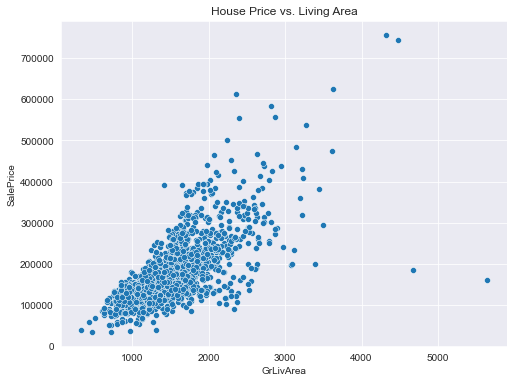

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
title = plt.title('House Price vs. Living Area')

plt.savefig('GrLivArea')

In [30]:
outlier_index = train_data[(train_data.GrLivArea > 4000)
                           & (train_data.SalePrice < 200000)].index
X.drop(outlier_index, axis=0, inplace=True)
y.drop(outlier_index, axis=0, inplace=True)

Use RobustScaler to tackle outliers and StandardScaler to standardize variables.

In [31]:
from sklearn.preprocessing import RobustScaler, StandardScaler

numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

standard_scaler = StandardScaler()
X[numerical_cols] = standard_scaler.fit_transform(X[numerical_cols])


# Feature Engineering

We have to encode categorical variables.
- Ordinal: Label Encoding
- Nominal: One-hot Encoding (Dummy Variables)

From our correlation matrix, as well as our earlier theories, we should create new variables.

- totalSqFt = TotalBsmtSF + 1stFlrSF + 2ndFlrSF
- totalBath = FullBath + BsmtFullBath + 0.5(HalfBath + BsmtHalfBath)

### Creating New Variables

Creating new variables totalSqFeet and totalBath, and dropping the variables they were made from.

In [32]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBath'] = X['FullBath'] + X['BsmtFullBath'] + 0.5 * (X['HalfBath'] + X['BsmtHalfBath'])


In [33]:
X.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 
        'BsmtFullBath', 'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)


### Label Encoding

Ordinal Variables are Label Encoded. I made a copy to re-modify when I get to the non-linear models, as dummified variables can mess with tree-based models and their performance. 

In [34]:
X_tree = X.copy()

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in ordinal_cols:
    X[feature] = label_encoder.fit_transform(X[feature])

### One-hot Encoding

In [36]:
X = pd.get_dummies(X, drop_first=True)

In [37]:
X.shape

(2917, 199)

Now that our data is cleaned, we can split our data back into train and test

In [38]:
ntest = len(test_data)
X_train = X.iloc[:-ntest, :]
X_testset = X.iloc[-ntest:, :]

print(X_train.shape)
print(X_testset.shape)

(1458, 199)
(1459, 199)


We have 210 variables; we can eliminate some based on correlation with sale price. 
We will remove the 100 least correlated features.

In [39]:
features_keep = list(abs(X_train.corrwith(y1)).sort_values(ascending=False)[:-100].index)
X_train = X_train[features_keep]
X_testset = X_testset[features_keep]

# Modeling

Linear:
- Multiple Linear Regression
- Ridge
- Lasso
- Elastic Net

Non-linear:
- Random Forest
- Gradient Boosting
- LightGBM
- XGBoost




In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error, r2_score


#### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_train, y, test_size=0.3, 
                                                    random_state=0)


### Functions

The goal is to find a model that minimizes RSME. Our target variable will be log of Sale Price.

In [42]:
def get_residuals(model, X, Y):
    
    residuals = Y - model.predict(X)
    
    return residuals

In [43]:
def model_evaluate(model, X, Y):
    rmse = mean_squared_error(Y, model.predict(X), squared = False)
    
    r2 = r2_score(Y, model.predict(X))
    
    
    if len(np.where(model.predict(X)>20)[0]) > 0: 
        rmse_dollars = np.nan
    else:
        rmse_dollars = mean_squared_error(np.exp(Y), 
                            np.exp(model.predict(X)), 
                            squared = False)
    
    print('RMSE: ', rmse)
    print('r^2: ', r2)
    print('RMSE: $', rmse_dollars)
    
    
    return rmse, r2, rmse_dollars

In [44]:
def plot_the_model(model, x_train, y_train, x_test, y_test):

    fig, axs = plt.subplots(1,2) 
    fig.set_figheight(5)
    fig.set_figwidth(10)

    x = np.linspace(10, 14.5, 100)
    y = np.linspace(10, 14.5, 100)
    

    # Actual vs. Predicted Plot
    
    axs[0].scatter(model.predict(x_train), 
         y_train, color='blue')
    axs[0].plot(x,y, 'r-')
 
    axs[0].set_ylabel('Actual log of Sale Price')
    axs[0].set_xlabel('Predicted log of Sale Price')
    axs[0].set_title('Linearity Assumption', fontsize = 20)

    axs[0].tick_params(axis='x')
    axs[0].legend(['line','Train'])
    
    axs[1].scatter(model.predict(x_test), 
         y_test, color='green') 
    axs[1].plot(x,y, 'r-')

    axs[1].set_ylabel('Actual log of Sale Price')
    axs[1].set_xlabel('Predicted log of Sale Price')
    axs[1].set_title('Linearity Assumption', fontsize = 20)
    axs[1].tick_params(axis='x')
    axs[1].legend(['line','Test'])

In [45]:
# Initializing for model comparison later on

model_descrp = []
r2_log_train = []
r2_log_test = []
rmse_log_train = []
rmse_log_test = []
rmse_dollars_train = []
rmse_dollars_test = []

In [46]:
def append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars):
    
    r2_log_train_temp = r2_train
    r2_log_test_temp = r2_test
    rmse_log_train_temp = rmse_train
    rmse_log_test_temp = rmse_test
    rmse_dollars_train_temp = rmse_train_dollars
    rmse_dollars_test_temp = rmse_test_dollars

    model_descrp.append(which_model)
    if r2_log_train_temp <= 1 and r2_log_train_temp > 0:
        r2_log_train.append(r2_log_train_temp)
    elif r2_log_train_temp > 1:   
        r2_log_train.append(1000)
    else:
        r2_log_train.append(-1000)

    if r2_log_test_temp <= 1 and r2_log_test_temp > 0:
        r2_log_test.append(r2_log_test_temp)
    elif r2_log_test_temp > 1:   
        r2_log_test.append(1000)
    else:
        r2_log_test.append(-1000)
    
    if rmse_log_train_temp <= 10:
        rmse_log_train.append(rmse_log_train_temp)
    elif rmse_log_train_temp > 10:   
        rmse_log_train.append(1000)

    if rmse_log_test_temp <= 10:
        rmse_log_test.append(rmse_log_test_temp)
    elif rmse_log_test_temp > 10:   
        rmse_log_test.append(1000)
        
    rmse_dollars_train.append(rmse_dollars_train_temp)
    rmse_dollars_test.append(rmse_dollars_test_temp)

## Linear Regression

In [47]:
def get_LinearRegression(X,Y):
    
    lm = LinearRegression()
    
    model = lm.fit(X, Y)
    print('LM model object created.')
    
    return model

In [48]:
lm_model = get_LinearRegression(X_train, y_train)

rmse_train, r2_train, rmse_train_dollars= model_evaluate(lm_model, X_train, y_train)

LM model object created.
RMSE:  0.10463396625746549
r^2:  0.9296511383570815
RMSE: $ 18602.65510387715


In [49]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(lm_model, X_test, y_test)

RMSE:  0.11375510357502125
r^2:  0.9234536223112202
RMSE: $ 21082.02463833952


Our model's R2 score is close to 0.93 on the unseen data. Our model can explain 92.5% of the variance in log SalePrice in our test data.

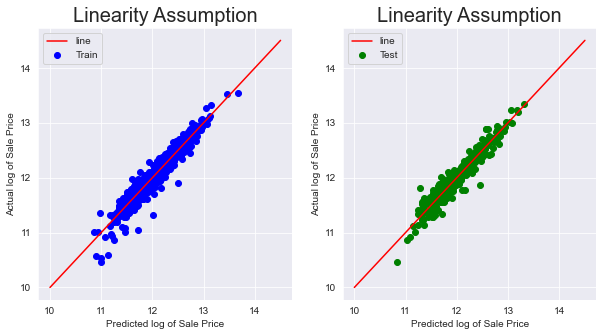

In [50]:
plot_the_model(lm_model, X_train, y_train, X_test, y_test)

plt.savefig('Linear Model')

In order to make valid references from our regression, the residuals should follow a normal distribution.

Skewness:  -1.1509408641680619


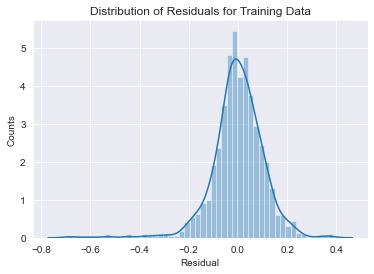

In [51]:
residuals_train = get_residuals(lm_model, X_train, y_train)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Training Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_train.skew())

plt.savefig('Distribution of Residuals Train_LM')

Skewness:  -0.1087703169674439


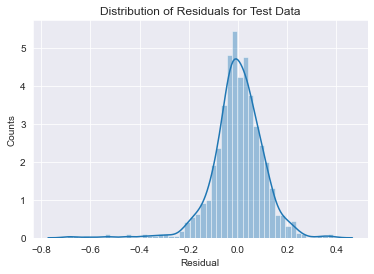

In [52]:
residuals_test = get_residuals(lm_model, X_test, y_test)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Test Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_test.skew())

plt.savefig('Distribution of Residuals Test_LM')

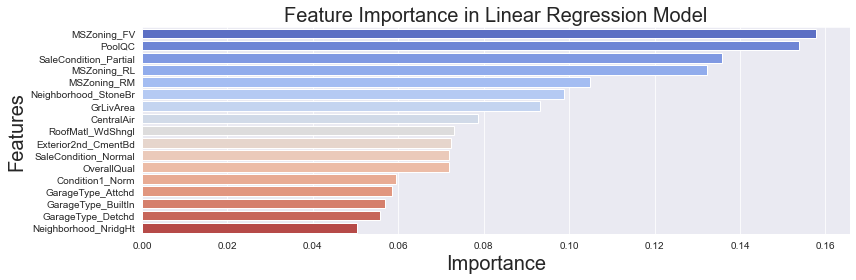

In [53]:
coefs = pd.DataFrame(zip(X_train, lm_model.coef_),
   columns=['Feature', 'Importance']
)

coefs = coefs.sort_values(by = 'Importance', ascending = False)

f, ax = plt.subplots(figsize = (12,4))
sns.barplot(data=coefs.loc[coefs.Importance>=0.05], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')

ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance in Linear Regression Model', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=10)
f.tight_layout()

plt.savefig('Feature Importance LM')


In [54]:
best_features_linear = dict()
best_features_linear['Linear Regression'] = coefs.loc[coefs.Importance>=0.05].Feature.values

In [55]:
which_model = "Linear Regression"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Regularized Regression

### Ridge Regression



In [56]:
def get_Ridge(X, Y):
    
    skfold = KFold(n_splits=5, shuffle=True, random_state=0)
    ridge_gs = Ridge()
    ridge_gs.set_params(normalize=False)
    
    # Searching for best Lambda
    params = { "alpha": np.linspace(10,20, 100) }

    gs = GridSearchCV(ridge_gs, params, scoring = "neg_mean_squared_error", cv=skfold)
    gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Ridge model object created.')
    print(gs.best_estimator_)
    
    return model

In [57]:
ridge_model = get_Ridge(X_train, y_train)

Ridge model object created.
Ridge(alpha=16.161616161616163)


In [58]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(ridge_model, X_train, y_train)

RMSE:  0.10735509775749948
r^2:  0.9259445471994749
RMSE: $ 19116.339934245643


In [59]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(ridge_model, X_test, y_test)

RMSE:  0.11445493001628577
r^2:  0.9225088917912969
RMSE: $ 21611.23248536276


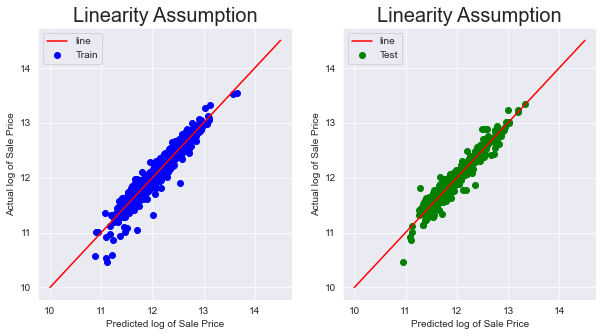

In [60]:
plot_the_model(ridge_model, X_train, y_train, X_test, y_test)

plt.savefig('Ridge Regression')

Skewness:  -1.3980720969525782


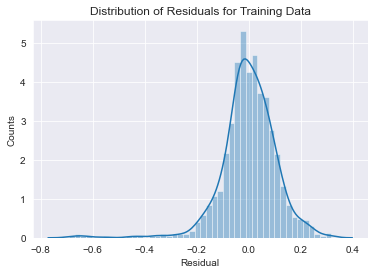

In [61]:
residuals_train = get_residuals(ridge_model, X_train, y_train)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Training Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_train.skew())

plt.savefig('Distribution of Residuals Train_RM')

Skewness:  -0.16604502209596664


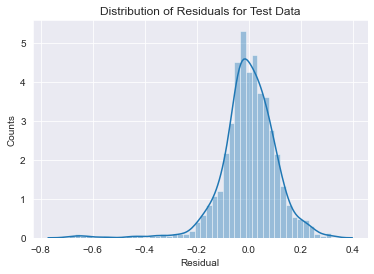

In [62]:
residuals_test = get_residuals(ridge_model, X_test, y_test)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Test Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_test.skew())

plt.savefig('Distribution of Residuals Test_RM')

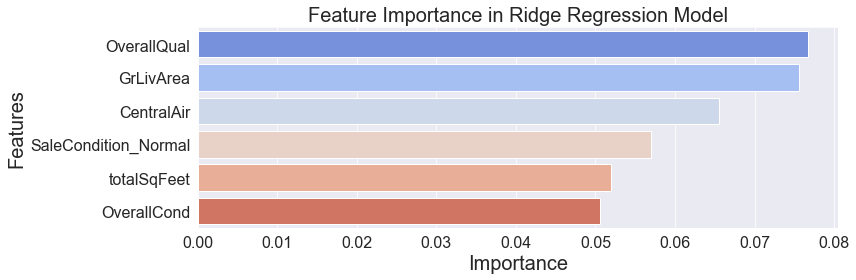

In [63]:
coefs = pd.DataFrame(zip(X_train, ridge_model.coef_),
   columns=['Feature', 'Importance']
)

coefs = coefs.sort_values(by = 'Importance', ascending = False)

f, ax = plt.subplots(figsize = (12,4))
sns.barplot(data=coefs.loc[coefs.Importance>=0.05], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')

ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance in Ridge Regression Model', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()

plt.savefig('Feature Importance Ridge')

In [64]:

best_features_linear['Ridge Regression Model'] = coefs.loc[coefs.Importance>=0.05].Feature.values


In [65]:
which_model = "Ridge Regression"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

### Lasso Regression

In [66]:
def get_Lasso(X, Y):
    

    skfold = KFold(n_splits=5, shuffle=True, random_state=0)
    lasso_gs  = Lasso()
    lasso_gs.set_params(normalize=False)
    
    # Searching for best lambda
    params = { "alpha": np.linspace(0.01, 0.1, 10)}

    gs = GridSearchCV(lasso_gs, params, scoring = "neg_mean_squared_error", cv=skfold)
    gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Lasso model object created.')
    print(gs.best_estimator_)
    
    return model

In [67]:
lasso_model = get_Lasso(X_train, y_train)

Lasso model object created.
Lasso(alpha=0.01)


In [68]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(lasso_model, X_train, y_train)

RMSE:  0.12582895210508896
r^2:  0.898264421743681
RMSE: $ 23045.508208400664


In [69]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(lasso_model, X_test, y_test)

RMSE:  0.1266153363358513
r^2:  0.9051678734475381
RMSE: $ 24156.7866377771


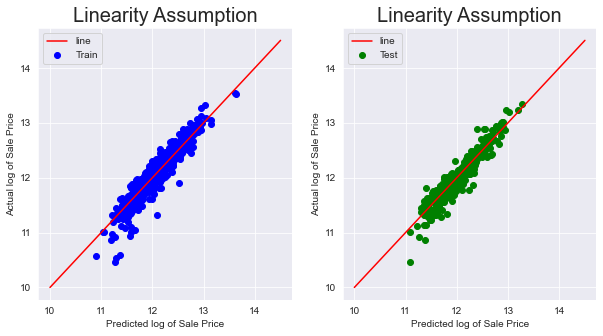

In [70]:
plot_the_model(lasso_model, X_train, y_train, X_test, y_test)

plt.savefig('Lasso Model')

Skewness:  -1.417952163473616


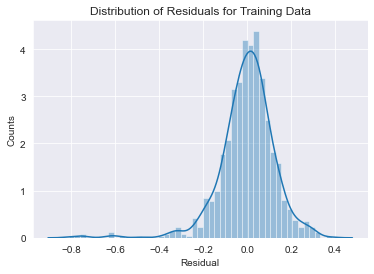

In [71]:
residuals_train = get_residuals(lasso_model, X_train, y_train)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Training Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_train.skew())

plt.savefig('Distribution of Residuals Train_Lasso')

Skewness:  -0.6361417646315134


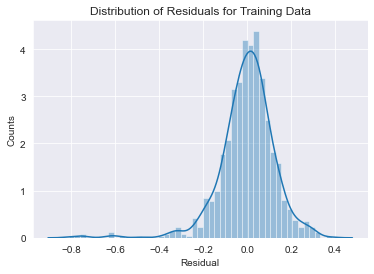

In [72]:
residuals_test = get_residuals(lasso_model, X_test, y_test)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Training Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_test.skew())

plt.savefig('Distribution of Residuals Test_Lasso')

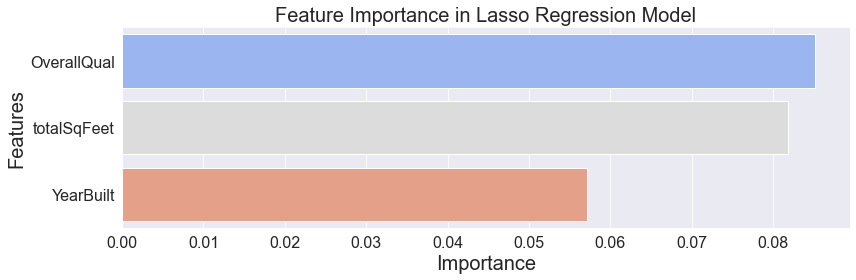

In [73]:
coefs = pd.DataFrame(zip(X_train, lasso_model.coef_),
   columns=['Feature', 'Importance']
)

coefs = coefs.sort_values(by = 'Importance', ascending = False)

f, ax = plt.subplots(figsize = (12,4))
sns.barplot(data=coefs.loc[coefs.Importance>=0.05], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')

ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance in Lasso Regression Model', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()

plt.savefig('Feature Importance Lasso')

In [74]:

best_features_linear['Lasso Regression Model'] = coefs.loc[coefs.Importance>=0.05].Feature.values


In [75]:
which_model = "Lasso Regression"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

### Elastic Net

In [76]:
def get_ElasticNet(X, Y):
    
    skfold = KFold(n_splits=5, shuffle=True, random_state=0)
    elastic_gs  = ElasticNet()
    elastic_gs.set_params(normalize=False)

    params = [{
        "alpha": np.linspace(.01, .02, 5),
        "l1_ratio": np.linspace(0.01, 0.05, 5)
    }]

    gs = GridSearchCV(elastic_gs, params, scoring = "neg_mean_squared_error", cv=skfold)
    gs.fit(X_train, y_train)
    
    model = gs.best_estimator_
    
    print('Elastic Net model object created.')
    print(gs.best_estimator_)
    
    return model

In [77]:
Elastic_Net_model = get_ElasticNet(X_train, y_train)

Elastic Net model object created.
ElasticNet(alpha=0.01, l1_ratio=0.03)


In [78]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(Elastic_Net_model, X_train, y_train)

RMSE:  0.10787496178717067
r^2:  0.9252255877553113
RMSE: $ 19297.2741609355


In [79]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(Elastic_Net_model, X_test, y_test)

RMSE:  0.11424633678778963
r^2:  0.922791088302119
RMSE: $ 21584.384133289223


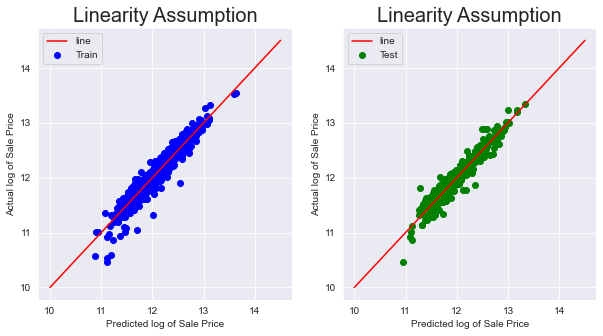

In [80]:
plot_the_model(Elastic_Net_model, X_train, y_train, X_test, y_test)

Skewness:  -1.3663479219872983


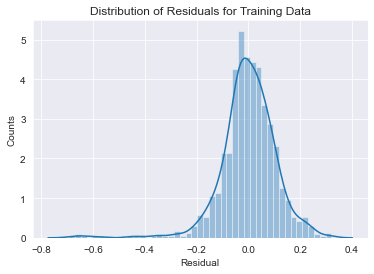

In [81]:
residuals_train = get_residuals(Elastic_Net_model, X_train, y_train)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Training Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_train.skew())

Skewness:  -0.15590844009124516


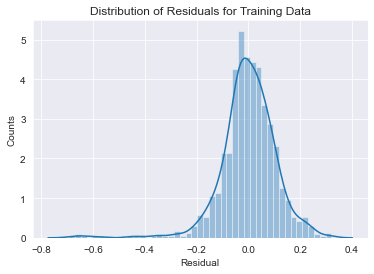

In [82]:
residuals_test = get_residuals(Elastic_Net_model, X_test, y_test)
sns.distplot(residuals_train)
plt.title('Distribution of Residuals for Training Data')
plt.ylabel('Counts')
plt.xlabel('Residual')

print("Skewness: ", residuals_test.skew())

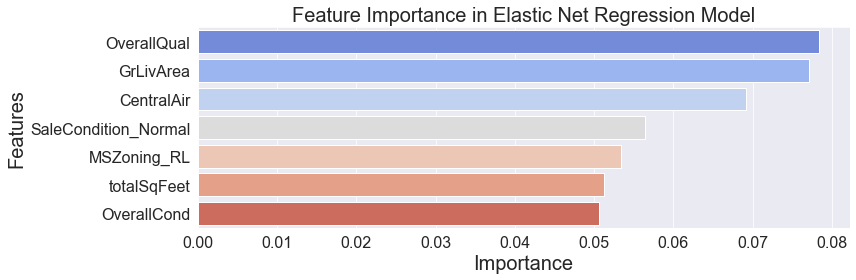

In [83]:
coefs = pd.DataFrame(zip(X_train, Elastic_Net_model.coef_),
   columns=['Feature', 'Importance']
)

coefs = coefs.sort_values(by = 'Importance', ascending = False)

f, ax = plt.subplots(figsize = (12,4))
sns.barplot(data=coefs.loc[coefs.Importance>=0.05], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')

ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance in Elastic Net Regression Model', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()

In [84]:

best_features_linear['Elastic Net Regression Model'] = coefs.loc[coefs.Importance>=0.05].Feature.values


In [85]:
which_model = "Elastic Net Regression"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

# Non-linear Models

As mentioned previously, I will be cleaning this data a little bit differently than I did for the linear models.

In [86]:
label_encoder = LabelEncoder()

for feature in catCols:
    X_tree[feature] = label_encoder.fit_transform(X_tree[feature])

In [87]:
ntest = len(test_data)
X_train_tree = X.iloc[:-ntest, :]
X_testset_tree = X.iloc[-ntest:, :]

print(X_train_tree.shape)
print(X_testset_tree.shape)

(1458, 199)
(1459, 199)


In [88]:
X_train, X_test, y_train, y_test = train_test_split( X_train_tree, y, test_size=0.3, 
                                                    random_state=0)

## Random Forest

In [89]:
def get_RandomForests_model(X, Y):

    skfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    gs_randomForest = RandomForestRegressor()

    para_grid_forest = [{
        "n_estimators": [100, 1000, 250],
        "max_features": [4, 5, 6, 8, 10],
        "min_samples_split":[2, 4, 6, 8, 10],
        "random_state": [0]}]
    gs = GridSearchCV(gs_randomForest, 
                        para_grid_forest, 
                        scoring='neg_mean_squared_error', 
                        cv = skfold,
                        n_jobs=-1)
    
    gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Random Forests model object created.')
    print(gs.best_estimator_)
    
    return model

In [90]:
random_forest_model = get_RandomForests_model(X_train, y_train)

Random Forests model object created.
RandomForestRegressor(max_features=10, n_estimators=1000, random_state=0)


In [91]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(random_forest_model, X_train, y_train)

RMSE:  0.05388899985486295
r^2:  0.9813399868646897
RMSE: $ 13254.997706630862


In [92]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(random_forest_model, X_test, y_test)

RMSE:  0.14067210067197558
r^2:  0.8829426173478772
RMSE: $ 32034.29514696791


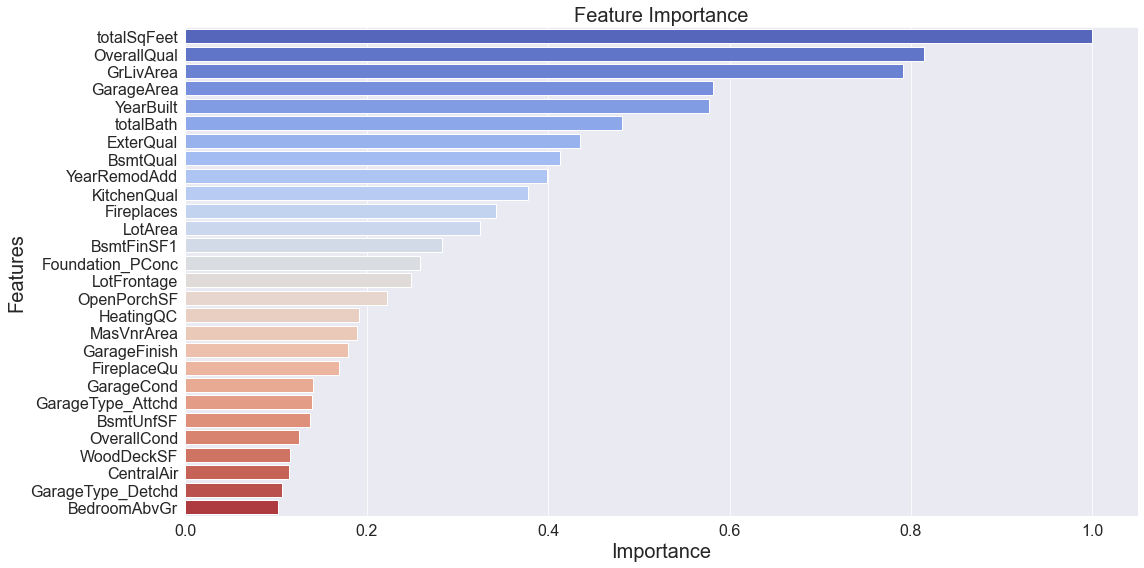

In [93]:
# Create plot data
plot_data = pd.DataFrame(zip(X, random_forest_model.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)

# Normalize so features are compared amongst themselves
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance at least 0.1
f, ax = plt.subplots(figsize = (16,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')
ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()


plt.savefig('Feature Importance RF')

In [94]:
# Store the best features
best_features = dict()
best_features['Random Forest'] = plot_data.loc[plot_data.Importance>=0.1].Feature.values

In [95]:
which_model = "Random Forest"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Gradient Boosting

In [96]:
def get_GradientBoosting_model(X, Y):
    from sklearn import ensemble
    from sklearn.ensemble import GradientBoostingRegressor

    skfold = KFold(n_splits=5, shuffle=True, random_state=0)
    gs_gbm = GradientBoostingRegressor()

    para_grid_gbm = [{
        "learning_rate": [0.001, 0.005, 0.01],
        "n_estimators": [500, 1000, 2000],
        "max_features": [4, 5, 6, 8],
        "min_samples_split":[2, 4, 6, 8, 10],
        "random_state": [0]}]
    gs = GridSearchCV(gs_gbm, 
                        para_grid_gbm, 
                        scoring='neg_mean_squared_error', 
                        cv = skfold,
                        n_jobs=-1)
    gs.fit(X, Y)
    
    model = gs.best_estimator_
    
    print('Random Forests model object created.')
    print(gs.best_estimator_)
    
    return model

In [97]:
gb_model = get_GradientBoosting_model(X_train, y_train)

Random Forests model object created.
GradientBoostingRegressor(learning_rate=0.01, max_features=8,
                          min_samples_split=4, n_estimators=2000,
                          random_state=0)


In [98]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(gb_model, X_train, y_train)

RMSE:  0.07371558344838501
r^2:  0.9650835314473916
RMSE: $ 12668.888425844092


In [99]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(gb_model, X_test, y_test)

RMSE:  0.11973767736310297
r^2:  0.915190496122076
RMSE: $ 23723.224562939362


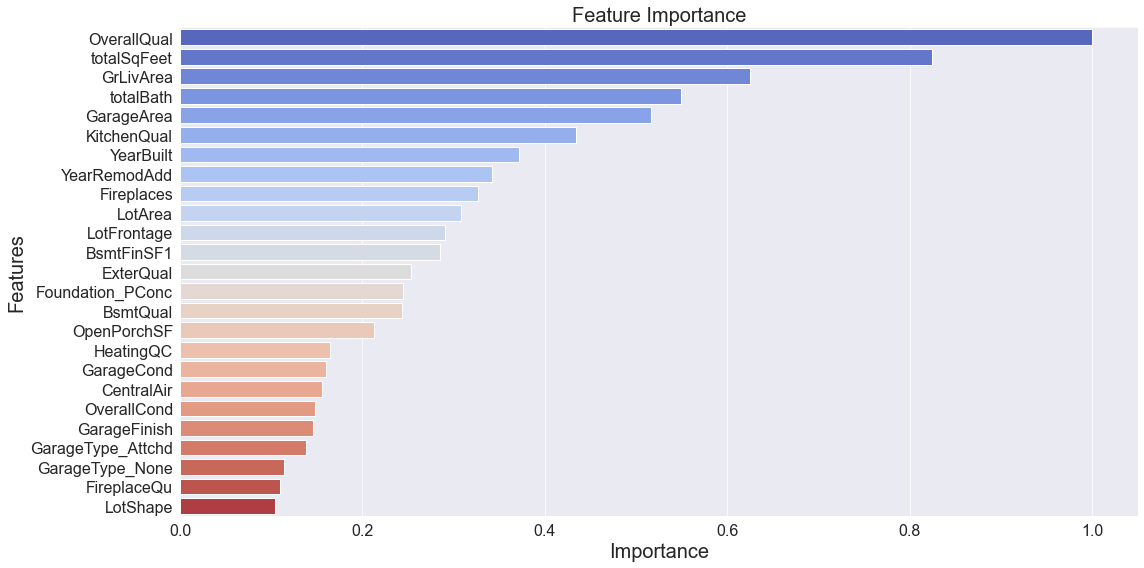

In [100]:
# Create plot data
plot_data = pd.DataFrame(zip(X, gb_model.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance at least 0.1
f, ax = plt.subplots(figsize = (16,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')
ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()

plt.savefig('Feature Importance Gradient Boosting')

In [101]:
best_features['Grandient Boosting'] = plot_data.loc[plot_data.Importance>=0.1].Feature.values

In [102]:
which_model = "Gradient Boosting"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

# LightGBM

In [103]:
def get_lightGBM_model(X, Y):
    
    skfold = KFold(n_splits=5, shuffle=True, random_state=0)

    gs_lightGBM = LGBMRegressor()
    
    para_grid_lightGBM ={
    'n_estimators': [200],
    'max_depth': np.linspace(start = 8, stop = 13, num = 6, dtype = int),
    'max_bin': np.linspace(start = 100, stop = 400, num = 4, dtype = int),
    'reg_alpha': np.linspace(start = 0.2, stop = 0.5, num = 4, dtype = float),
    'reg_lambda': np.linspace(start = 0.3, stop = 0.6, num = 4, dtype = float)
}
    
    gs = GridSearchCV(gs_lightGBM,
                      para_grid_lightGBM,
                      scoring='neg_mean_squared_error', 
                      cv = skfold,
                      n_jobs=-1,
                      verbose = 2)
    
    gs.fit(X,Y)
    
    model = gs.best_estimator_
    
    print('Light GBM object created.')
    print(gs.best_estimator_)
    
    return model


In [104]:
lgbm_model = get_lightGBM_model(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.2, reg_lambda=0.3; total time=   0.5s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.2, reg_lambda=0.39999999999999997; total time=   0.3s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.2, reg_lambda=0.6; total time=   0.3s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.3, reg_lambda=0.39999999999999997; total time=   0.2s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.3, reg_lambda=0.6; total time=   0.2s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.4, reg_lambda=0.39999999999999997; total time=   0.2s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.4, reg_lambda=0.5; total time=   0.2s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0.5, reg_lambda=0.3; total time=   0.1s
[CV] END max_bin=100, max_depth=8, n_estimators=200, reg_alpha=0

[CV] END max_bin=100, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.39999999999999997; total time=   0.2s
[CV] END max_bin=100, max_depth=9, n_estimators=200, reg_alpha=0.5, reg_lambda=0.6; total time=   0.1s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.2, reg_lambda=0.39999999999999997; total time=   0.2s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.2, reg_lambda=0.5; total time=   0.2s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.3, reg_lambda=0.3; total time=   0.2s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.3, reg_lambda=0.39999999999999997; total time=   0.2s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.3, reg_lambda=0.6; total time=   0.2s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.4, reg_lambda=0.3; total time=   0.1s
[CV] END max_bin=100, max_depth=10, n_estimators=200, reg_alpha=0.4, reg_lambda=0.5; total time=   0.1s
[CV] END max_bin=1

Light GBM object created.
LGBMRegressor(max_bin=200, max_depth=12, n_estimators=200, reg_alpha=0.3,
              reg_lambda=0.39999999999999997)


In [105]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(lgbm_model, X_train, y_train)

RMSE:  0.032654923387725604
r^2:  0.9931481312293213
RMSE: $ 7543.10630262645


In [106]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(lgbm_model, X_test, y_test)

RMSE:  0.13104204461055782
r^2:  0.8984209411247016
RMSE: $ 24305.636530990083


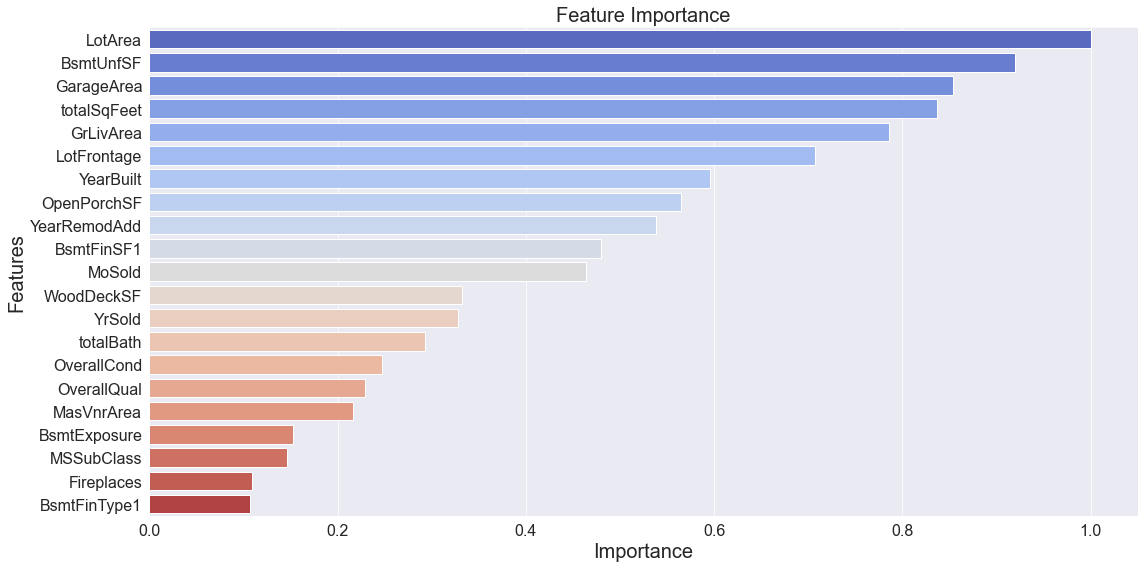

In [107]:
# Create plot data
plot_data = pd.DataFrame(zip(X, lgbm_model.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance at least 0.1
f, ax = plt.subplots(figsize = (16,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')
ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()

plt.savefig('Feature Importance LightGBM')

In [108]:
best_features['Light GBM'] = plot_data.loc[plot_data.Importance>=0.1].Feature.values


In [109]:
which_model = "light GBM"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## XGBoost

In [110]:
def get_XGB_model(X, Y):
    
    skfold = KFold(n_splits=5, shuffle=True, random_state=0)

    gs_XGBM = XGBRegressor()
    
    para_grid_XGBM ={
    'n_estimators': [200],
    'max_depth': np.linspace(start = 8, stop = 13, num = 6, dtype = int),
    'max_bin': np.linspace(start = 100, stop = 400, num = 4, dtype = int),
    'reg_alpha': np.linspace(start = 0.2, stop = 0.5, num = 4, dtype = float),
    'reg_lambda': np.linspace(start = 0.3, stop = 0.6, num = 4, dtype = float)
}
    
    gs = GridSearchCV(gs_XGBM,
                      para_grid_XGBM,
                      scoring='neg_mean_squared_error', 
                      cv = skfold,
                      n_jobs=-1,
                      verbose = 1)
    
    gs.fit(X,Y)
    
    model = gs.best_estimator_
    
    print('XGBM object created.')
    print(gs.best_estimator_)
    
    return model

In [111]:
xgb_model = get_XGB_model(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
XGBM object created.
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=100, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=0.3, ...)


In [112]:
rmse_train, r2_train, rmse_train_dollars= model_evaluate(xgb_model, X_train, y_train)

RMSE:  0.03265825078787274
r^2:  0.9931467348046266
RMSE: $ 6869.9998033081065


In [113]:
rmse_test, r2_test, rmse_test_dollars= model_evaluate(xgb_model, X_test, y_test)

RMSE:  0.13377276062033822
r^2:  0.89414332644012
RMSE: $ 25045.978390193246


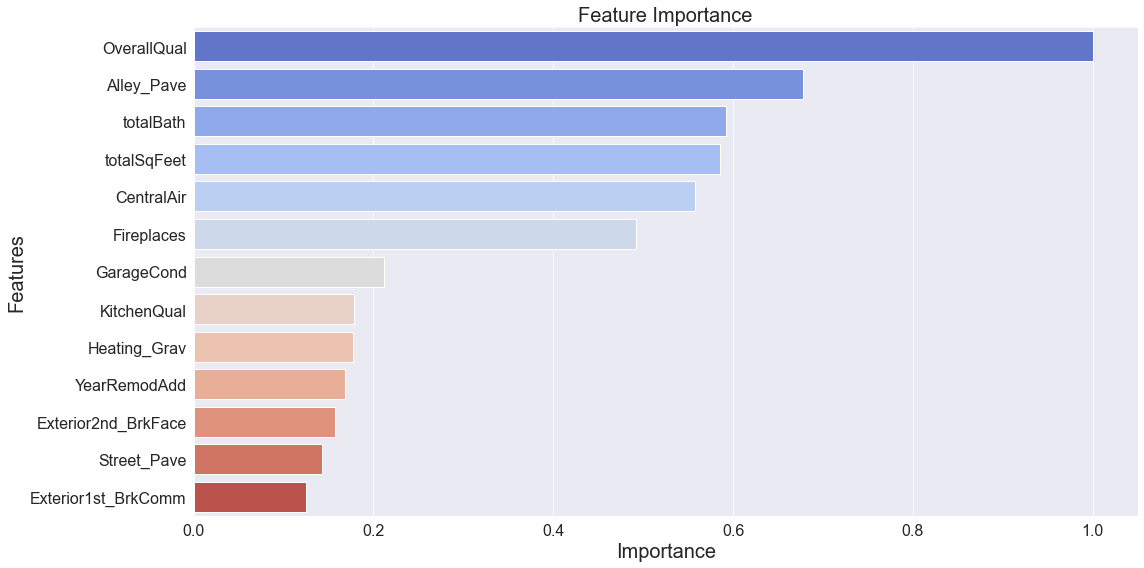

In [114]:
# Create plot data
plot_data = pd.DataFrame(zip(X, xgb_model.feature_importances_),
             columns = ['Feature', 'Importance'])
plot_data = plot_data.sort_values(by = 'Importance', ascending = False)
plot_data['Importance'] = plot_data['Importance'].values / plot_data['Importance'].values.max()

# Plot importance at least 0.1
f, ax = plt.subplots(figsize = (16,8))
sns.barplot(data=plot_data.loc[plot_data.Importance>=0.1], 
            y='Feature', 
            x='Importance',
            palette='coolwarm')
ax.set_xlabel('Importance', fontsize = 20)
ax.set_ylabel('Features', fontsize = 20)
ax.set_title('Feature Importance', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=16)
f.tight_layout()

plt.savefig('Feature Importance XGBoost')

In [115]:
best_features['XGBoost'] = plot_data.loc[plot_data.Importance>=0.1].Feature.values


In [116]:
which_model = "XGBoost"

append_metrics(which_model, r2_train, r2_test, rmse_train, rmse_test, rmse_train_dollars, rmse_test_dollars)

## Comparing Model Results

In [117]:
pd.options.display.float_format = '{:,.4f}'.format
zipped = list(zip(model_descrp,
                 rmse_log_train, rmse_log_test,
                 rmse_dollars_train, rmse_dollars_test,
                 r2_log_train, r2_log_test))

results = pd.DataFrame(zipped, columns=['model',
                                       'rmse log train',
                                       'rmse log test',
                                       'rmse_dollars_train', 
                                       'rmse_dollars_test',
                                       'r2 train',
                                       'r2 test',
                                       ])

results_sorted = results.sort_values('rmse log test', ascending = True)
results_sorted.head(10)

,model,rmse log train,rmse log test,rmse_dollars_train,rmse_dollars_test,r2 train,r2 test
0,Linear Regression,0.1046,0.1138,"18,602.6551","21,082.0246",0.9297,0.9235
3,Elastic Net Regression,0.1079,0.1142,"19,297.2742","21,584.3841",0.9252,0.9228
1,Ridge Regression,0.1074,0.1145,"19,116.3399","21,611.2325",0.9259,0.9225
5,Gradient Boosting,0.0737,0.1197,"12,668.8884","23,723.2246",0.9651,0.9152
2,Lasso Regression,0.1258,0.1266,"23,045.5082","24,156.7866",0.8983,0.9052
6,light GBM,0.0327,0.1310,"7,543.1063","24,305.6365",0.9931,0.8984
7,XGBoost,0.0327,0.1338,"6,869.9998","25,045.9784",0.9931,0.8941
4,Random Forest,0.0539,0.1407,"13,254.9977","32,034.2951",0.9813,0.8829


Interesting to see that Linear Regression has the lowest RMSE with Ridge Regression coming in second.

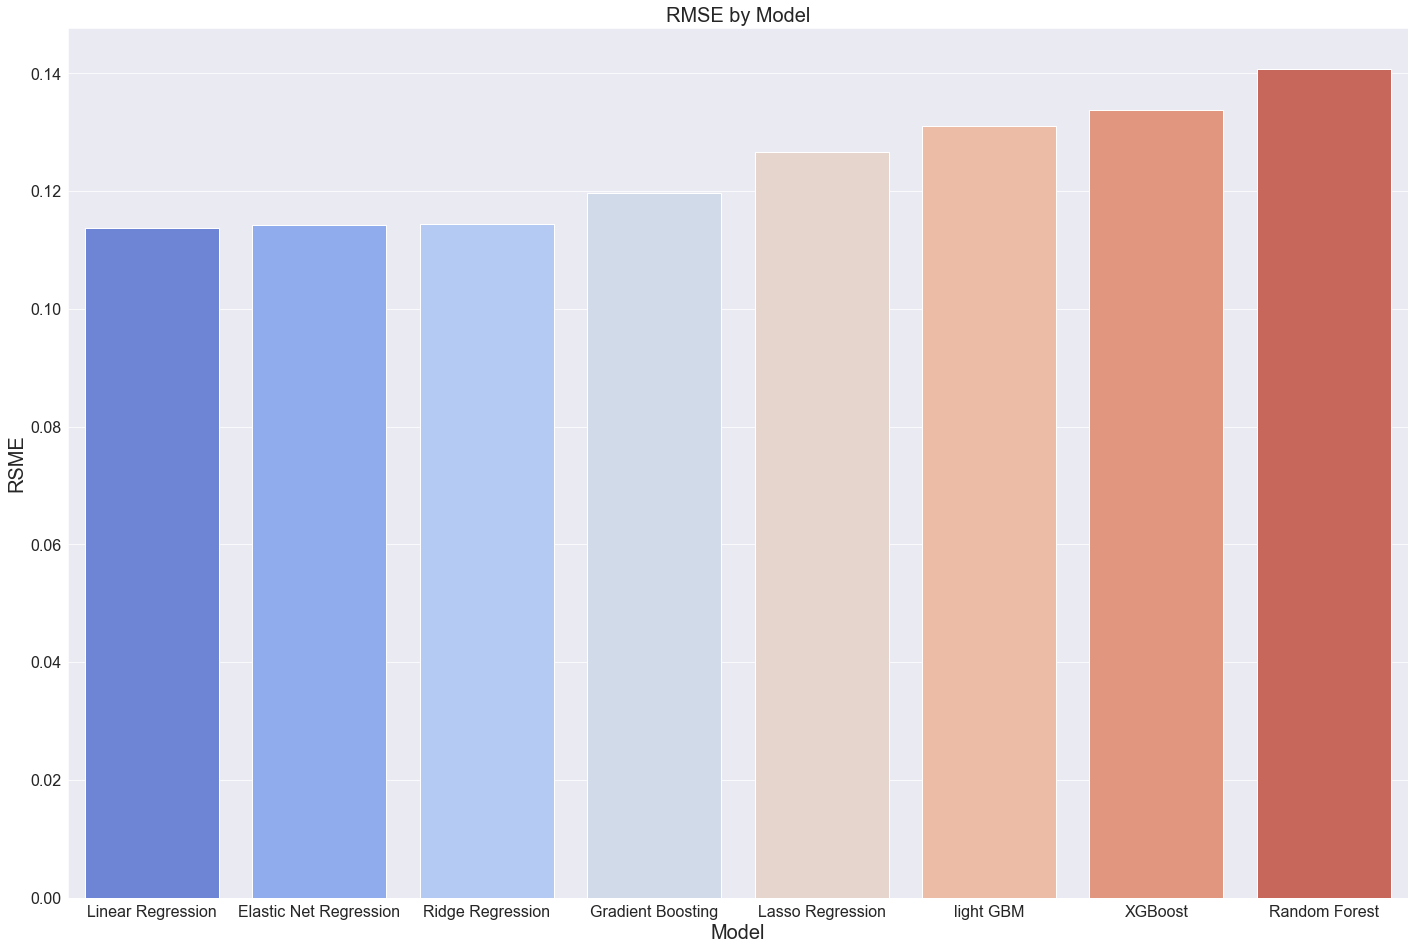

In [118]:
f, ax = plt.subplots(figsize = (24,16))
sns.barplot(data=results_sorted, 
            y='rmse log test', 
            x='model',
            palette='coolwarm')
ax.set_xlabel('Model', fontsize = 20)
ax.set_ylabel('RSME', fontsize = 20)
ax.set_title('RMSE by Model', fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)

plt.savefig('RMSE by Model')

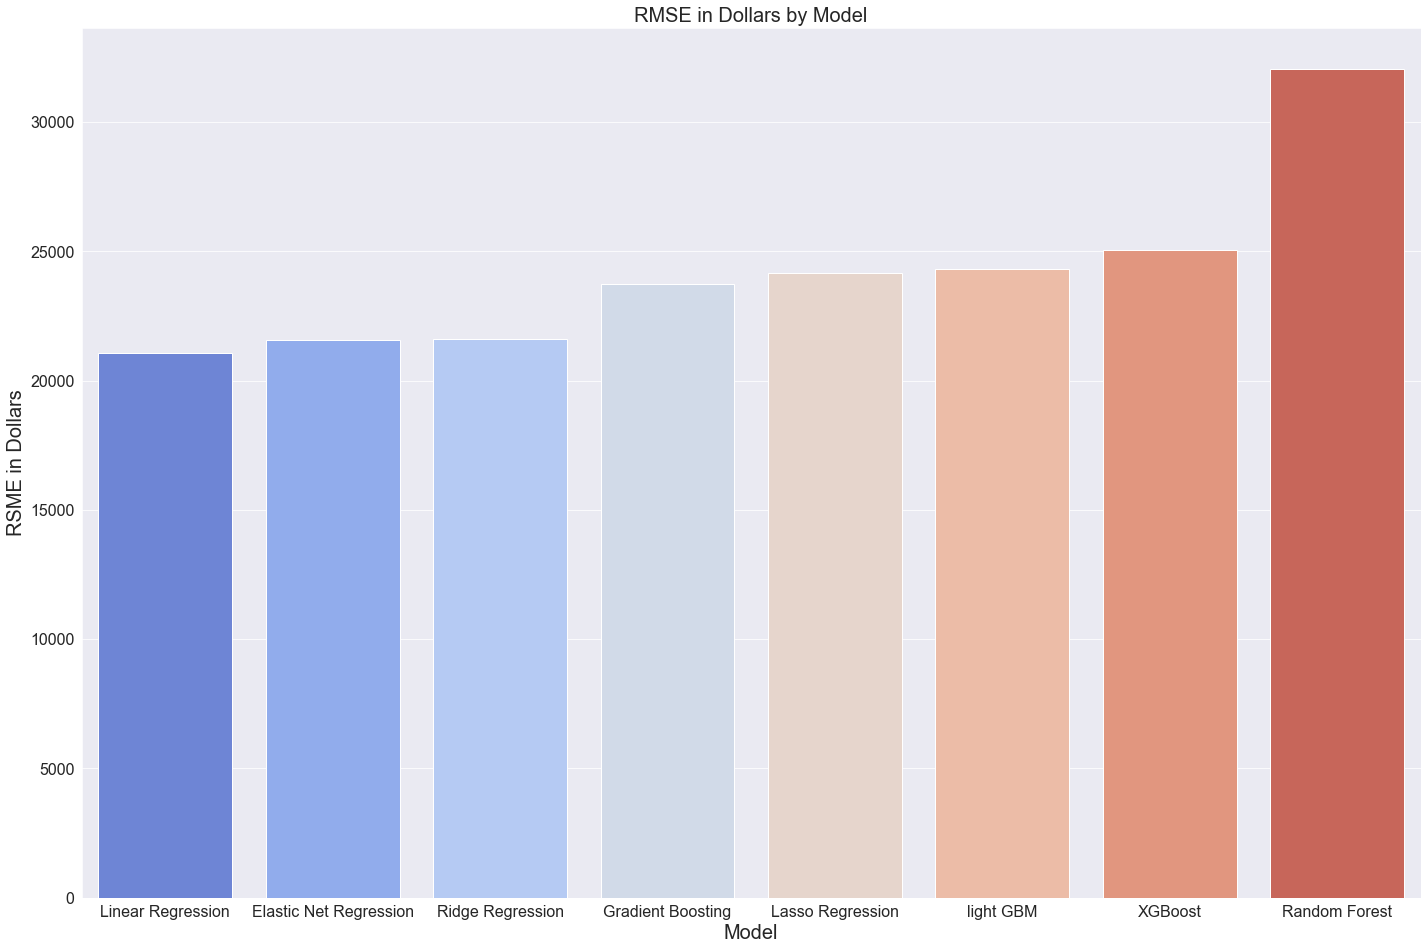

In [119]:
f, ax = plt.subplots(figsize = (24,16))
sns.barplot(data=results_sorted, 
            y='rmse_dollars_test', 
            x='model',
            palette='coolwarm')
ax.set_xlabel('Model', fontsize = 20)
ax.set_ylabel('RSME in Dollars', fontsize = 20)

ax.set_title('RMSE in Dollars by Model', fontsize = 20)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.tick_params(axis='y', which='major', labelsize=16)

plt.savefig('RMSE in Dollars by Model')

### Most Frequent "Best" Features

In [120]:
from collections import Counter

keep_features_linear = list()

for best_feature in best_features_linear.values():
    keep_features_linear = keep_features_linear + list(best_feature)
keep_features_count_linear = Counter(keep_features_linear)

In [121]:
print(best_features_linear)

{'Linear Regression': array(['MSZoning_FV', 'PoolQC', 'SaleCondition_Partial', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_StoneBr', 'GrLivArea', 'CentralAir',
       'RoofMatl_WdShngl', 'Exterior2nd_CmentBd', 'SaleCondition_Normal',
       'OverallQual', 'Condition1_Norm', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'Neighborhood_NridgHt'],
      dtype=object), 'Ridge Regression Model': array(['OverallQual', 'GrLivArea', 'CentralAir', 'SaleCondition_Normal',
       'totalSqFeet', 'OverallCond'], dtype=object), 'Lasso Regression Model': array(['OverallQual', 'totalSqFeet', 'YearBuilt'], dtype=object), 'Elastic Net Regression Model': array(['OverallQual', 'GrLivArea', 'CentralAir', 'SaleCondition_Normal',
       'MSZoning_RL', 'totalSqFeet', 'OverallCond'], dtype=object)}


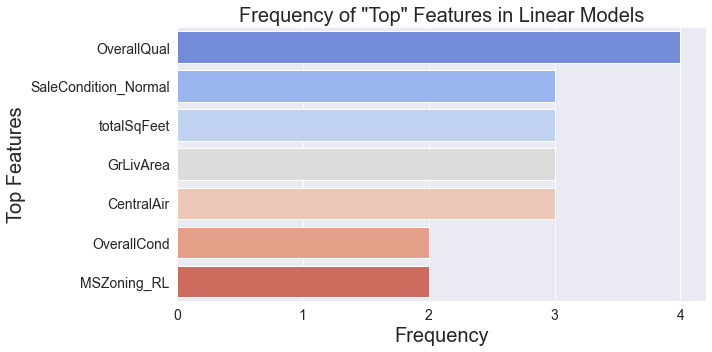

In [122]:
plot_data_linear = pd.DataFrame(zip(keep_features_count_linear.keys(), 
                             keep_features_count_linear.values()),
             columns = ['Feature', 'Count'])
plot_data_linear = plot_data_linear.sort_values(by = 'Count', ascending = False)

# Plot features that are considered "important" in multiple models
f, ax = plt.subplots(figsize = (10,5))
sns.barplot(data=plot_data_linear.loc[plot_data_linear.Count>1], 
            y='Feature', 
            x='Count',
            palette='coolwarm')

ax.set_xticks([0,1,2,3,4])
ax.set_xlabel('Frequency', fontsize = 20)
ax.set_ylabel('Top Features', fontsize = 20)
ax.set_title('Frequency of "Top" Features in Linear Models', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=14)
f.tight_layout()

plt.savefig('Best Features in Linear Models')

In [123]:
keep_features = list()
for best_feature in best_features.values():
    keep_features = keep_features + list(best_feature)
keep_features_count = Counter(keep_features)

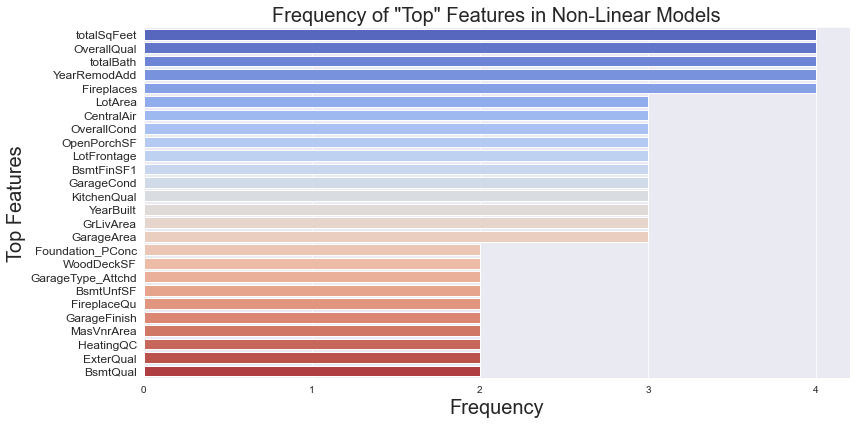

In [124]:
plot_data = pd.DataFrame(zip(keep_features_count.keys(), keep_features_count.values()),
             columns = ['Feature', 'Count'])
plot_data = plot_data.sort_values(by = 'Count', ascending = False)

# Plot features that are considered "important" in multiple models
f, ax = plt.subplots(figsize = (12,6))
sns.barplot(data=plot_data.loc[plot_data.Count>1], 
            y='Feature', 
            x='Count',
            palette='coolwarm')

ax.set_xticks([0,1,2,3,4])
ax.set_xlabel('Frequency', fontsize = 20)
ax.set_ylabel('Top Features', fontsize = 20)
ax.set_title('Frequency of "Top" Features in Non-Linear Models', fontsize = 20)
ax.tick_params(axis='y', which='major', labelsize=12)
f.tight_layout()

plt.savefig('Best Features in Non-Linear Models')

In [125]:
predicted = lm_model.predict(X_testset)
predicted_trans = np.exp(predicted)

submit = pd.DataFrame()
submit['SalePrice'] = predicted_trans
submit.to_csv('Kaggle_submit.csv',index=False)
submit

,SalePrice
0,"105,818.9068"
1,"158,056.9219"
2,"178,848.4072"
3,"198,585.8381"
4,"208,246.7991"
...,...
1454,"82,265.0134"
1455,"77,356.8955"
1456,"172,788.6991"
1457,"116,747.1234"
